In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
import seaborn as sns
from matplotlib.colors import LogNorm
#import matplotlib.pylab as plt

In [6]:
df1 = pd.read_csv("data/run0115_git_det37_tier3_table.txt", sep=" ", header=0)
df2 = pd.read_csv("data/run0113_git_det37_tier3_table.txt", sep=" ", header=0)
df3 = pd.read_csv("data/run0112_git_det37_tier3_table.txt", sep=" ", header=0)

In [7]:
l15 = len(df1)
energy15 = df1[df1.columns[0]]
AoE15 = df1[df1.columns[1]]
AoE_norm15 = AoE15/0.03466457685

l13 = len(df2)
energy13 = df2[df2.columns[0]]
AoE13 = df2[df2.columns[1]]
AoE_norm13 = AoE13/0.034453705499999994

l12 = len(df3)
energy12 = df3[df3.columns[0]]
AoE12 = df3[df3.columns[1]]
AoE_norm12 = AoE12/0.03458507898999999

# run0112_centroid = 0.03458507898999999
# run0113_centroid = 0.034453705499999994
# run0115_centroid = 0.03466457685

'\nfig, axs = plt.subplots(1,2, figsize=(15,6), facecolor=\'w\', edgecolor=\'k\', gridspec_kw={\'width_ratios\': [1, 3]})\n\nsns.histplot(ax=axs[0], data=AoE, bins=100, log_scale=False, element="step", fill=False, color=\'r\', label=\'A/E\')\naxs[0].set_xlabel(\'A/E [a.u.]\')\naxs[0].set_ylabel(\'counts\')\n#axs[0].set_ylim(0,2e4)\n#axs[0].set_xlim(0,2)\n#axs[0].set_yticks([0,5e3,1e4,1.5e4])\naxs[0].grid()\naxs[0].legend()\n\n#Energy spectrum\nsns.histplot(ax=axs[1], data=energy, bins=10000, log_scale=False, element="step", fill=False, color=\'blue\', label=\'Energy\')\naxs[1].set_xlabel(\'Energy [keV]\')\naxs[1].axvline(240, color=\'violet\', label=\'domiannt line 84 keV\')\naxs[1].set_yscale(\'log\')\naxs[1].set_xlim(0,3000)\naxs[1].grid()\naxs[1].legend()\n'

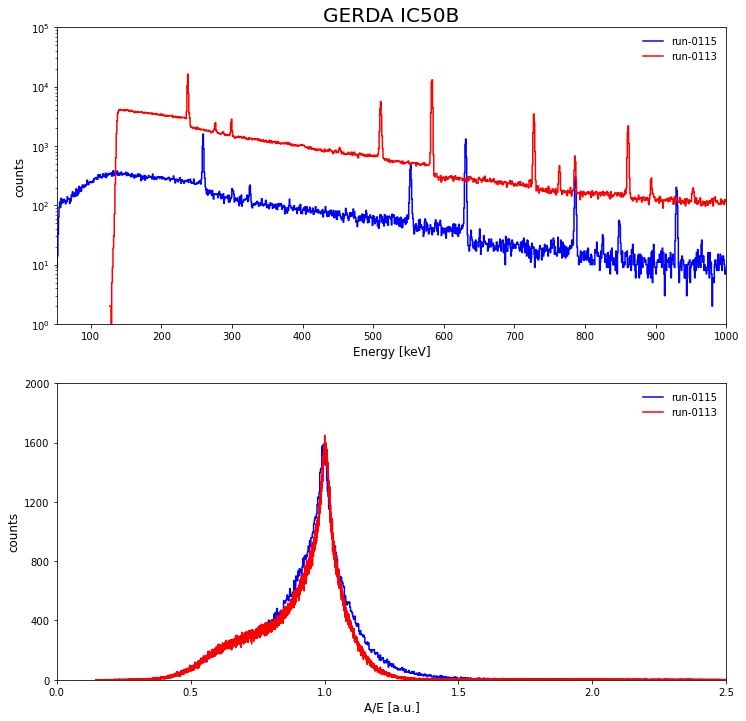

In [9]:
fig, axs = plt.subplots(2,1, figsize=(12,12), facecolor='w', edgecolor='k')

sns.histplot(ax = axs[0], data=energy15, bins=5000, log_scale=False, element="step", fill=False, color='blue', label='run-0115')
sns.histplot(ax = axs[0], data=energy13, bins=5000, log_scale=False, element="step", fill=False, color='red', label='run-0113')
sns.histplot(ax = axs[0], data=energy12, bins=5000, log_scale=False, element="step", fill=False, color='green', label='run-0112')
axs[0].axvline(2600)
axs[0].set_xlabel('Energy [keV]', fontsize=12)
axs[0].set_ylabel('counts', fontsize=12)
axs[0].set_xlim(min(energy15),1000)
axs[0].set_xticks(np.arange(100,1100,100))
axs[0].set_yscale('log')
axs[0].set_ylim(1,1e5)
axs[0].legend(frameon=False)
axs[0].set_title('GERDA IC50B', fontsize=20)

sns.histplot(ax = axs[1], data=AoE_norm15, bins=1000, log_scale=False, element="step", fill=False, color='b', label='run-0115')
sns.histplot(ax = axs[1], data=AoE_norm13, bins=10000, log_scale=False, element="step", fill=False, color='red', label='run-0113')
sns.histplot(ax = axs[1], data=AoE_norm12, bins=10000, log_scale=False, element="step", fill=False, color='green', label='run-0112')
axs[1].set_xlabel('A/E [a.u.]', fontsize=12)
axs[1].set_ylabel('counts', fontsize=12)
axs[1].set_xlim(0,2.5)
axs[1].set_yticks(np.arange(0,2400,400))
axs[1].set_xticks(np.arange(0,3,0.5))
axs[1].legend(frameon=False)

'\nplt.text(750, 1, ("SSE band"), fontsize=10, color=\'r\', style=\'oblique\', \n        bbox=dict(facecolor=\'w\', edgecolor=\'r\', boxstyle=\'round,pad=0.4\'))\n\nplt.text(1250, 0.6, ("MSE band"), fontsize=10, color=\'r\', style=\'oblique\', \n        bbox=dict(facecolor=\'w\', edgecolor=\'r\', boxstyle=\'round,pad=0.4\'))\n\nplt.text(250, 2, ("P+ events"), fontsize=10, color=\'r\', style=\'oblique\', \n        bbox=dict(facecolor=\'w\', edgecolor=\'r\', boxstyle=\'round,pad=0.4\'))\n\nplt.text(250, 0.6, ("n+ events"), fontsize=10, color=\'r\', style=\'oblique\', \n        bbox=dict(facecolor=\'w\', edgecolor=\'r\', boxstyle=\'round,pad=0.4\'))\n'

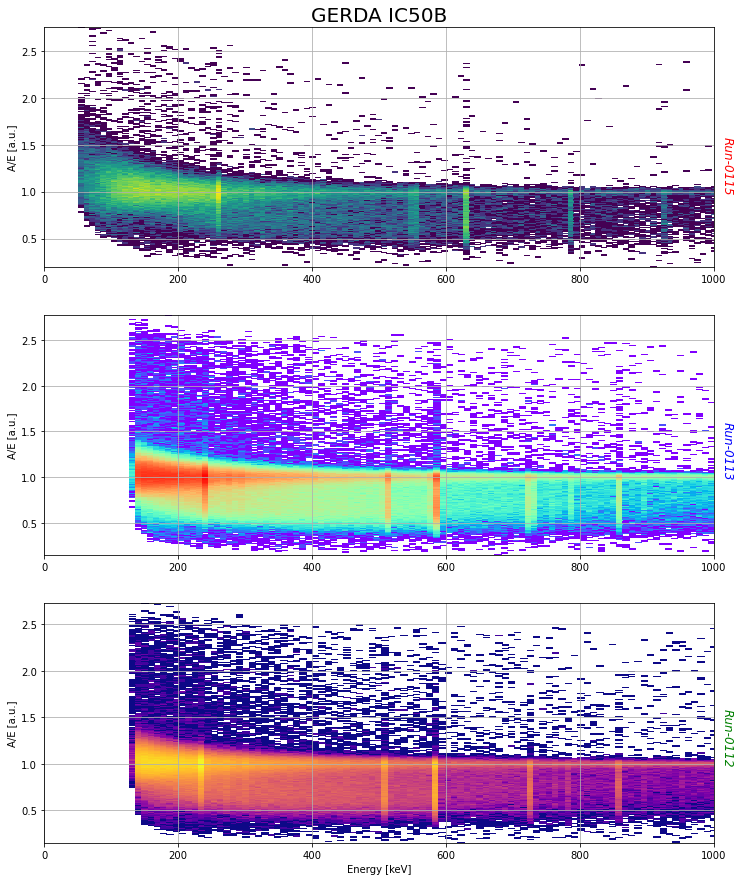

In [32]:
x, y = np.asarray(energy15), np.asarray(AoE_norm15)
m, n = np.asarray(energy13), np.asarray(AoE_norm13)
l, k = np.asarray(energy12), np.asarray(AoE_norm12)

fig, axs = plt.subplots(3,1, figsize=(12,15), facecolor='w', edgecolor='k')

axs[0].hist2d(x, y, bins=(500, 500),  norm=mpl.colors.LogNorm(), cmap='viridis', label='run-0115')
axs[0].set_xlim(0,1000)
axs[0].set_ylabel('A/E [a.u.]')
axs[0].grid(True)

axs[1].hist2d(m, n, bins=(500, 500),  norm=mpl.colors.LogNorm(), cmap='rainbow')
axs[1].set_xlim(0,1000)
axs[1].set_ylabel('A/E [a.u.]')
axs[1].grid(True)

axs[2].hist2d(l, k, bins=(500, 500),  norm=mpl.colors.LogNorm(), cmap='plasma')
axs[2].set_xlim(0,1000)
axs[2].set_ylabel('A/E [a.u.]')
axs[2].set_xlabel('Energy [keV]')
axs[2].grid(True) 

axs[0].text(1010, 1, ("Run-0115"), fontsize=12, color='r', style='oblique', rotation=-90)
axs[1].text(1010, 1, ("Run-0113"), fontsize=12, color='b', style='oblique', rotation=-90)
axs[2].text(1010, 1, ("Run-0112"), fontsize=12, color='g', style='oblique', rotation=-90)
axs[0].set_title('GERDA IC50B', fontsize=20)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import stats
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ConstantModel
from lmfit import Model

#------------------------------------------------------------------------------------------------------------------
df = pd.read_csv("data/run0113_git_det35_tier3_table.txt", sep=" ", header=0)
df.head()
l = len(df)
energy = df[df.columns[0]]
meanpeak = 0.03444373720763273 # 0.034723684138888884 #0.03444373720763273
AoE = df[df.columns[1]]#/meanpeak


#-------------------------------------------------------
#A , B, w = 115, 145, 30           #start - end - energy window 
A , B, w = 500, 530, 30           #start - end - energy window  
n = 100
binw = 0.00045      #bin width 0.008 , 0.0045, 0.002
#------------------------------- --------------------------------------------------------------- Models
def gauss(x, amp, center, sigma):
    return amp/(np.sqrt(2*np.pi))/sigma*(np.exp(-0.5*((x-center)/sigma)**2))
def tail(x, m, f, l, d, t):
    return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)
def fexpo(x, f, a):
    return exp(f * x + a)
def totalfit(x, ampl, mu, std, m, f, l, t):
    return gauss(x, ampl, mu, std) + tail(x, m, f, l, 0, t)
#--------------------------------------------------------------------------------------------- Figure settings
fig, axs = plt.subplots(10,5, figsize=(40,40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)
axs = axs.ravel()
#--------------------------------------------------------------------------------------------- Fitting parameters
chi = []
means = []
meanstot = []
stds  =  []
stdtot = []
xticks = []
centroid_list = []
#------------------------------------------------------- data extraction
for j in range(50):
    data = []
    for i in range(len(energy)):
        if energy[i] > A and energy[i]< B:
            data.append(AoE[i])
    xdata = np.asarray(data)
#-------------------------------------------------------
#------------------------------------------------------- bins and centroid
    b = len(np.arange(min(xdata), max(xdata) + binw, binw))
    y,x,_= axs[j].hist(xdata, \
                       bins = n, \
                       histtype=u'step', density=True, alpha=0.5, color='orange', \
                       label='%.f to %.f keV' %(A, B))

    x = (x[1:]+x[:-1])/2    
    centroid = x[np.argmax(y)]
    centroid_list.append(centroid)
#-------------------------------------------------------
    
#------------------------------------------------------- Gaussian model        
    model1 = Model(gauss, prefix='g_')
    paramslm = model1.make_params(g_amp=len(xdata), g_center=centroid, g_sigma=centroid*0.01)
    paramslm['g_amp'].min = 0.
    paramslm['g_center'].min = centroid * 0.9
    paramslm['g_center'].max = centroid * 1.1
    paramslm['g_sigma'].min = 0
    paramslm['g_sigma'].max = 1
    
    result1 = model1.fit(y[(x>centroid*0.985) & (x<centroid*1.2)], paramslm, x=x[(x>centroid*0.985) & (x<centroid*1.2)])
    means.append(result1.params['g_center'].value)
    stds.append(result1.params['g_sigma'].value)
    xticks.append(A)

#-------------------------------------------------------

#------------------------------------------------------- Expo
    model3 = Model(fexpo, prefix='e_') 
    paramslmex = model3.make_params(e_f=1, e_a=1)
    
    expo_min = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
    expo_max = result1.params['g_center'].value - 4*result1.params['g_sigma'].value
    
    fmin = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
    fmax = result1.params['g_center'].value + 10*result1.params['g_sigma'].value

    result3 = model3.fit(y[x>fmin], paramslmex, x=x[x>fmin])    
#-------------------------------------------------------

#------------------------------------------------------- The tail(from direct model)
    enteries = 0
    for i in range(len(xdata)):
        if (xdata[i] < result1.params['g_center'].value  - 3*result1.params['g_sigma'].value) & \
        (xdata[i] > result1.params['g_center'].value  - 25*result1.params['g_sigma'].value):
            enteries = enteries +1
    model2 = Model(tail, prefix='t_') 
    paramslm2 = model2.make_params(t_m= enteries * result1.params['g_center'].value, \
                              t_f= result3.params['e_f'].value, \
                              t_l= result1.params['g_center'].value - 1.2 * result1.params['g_sigma'].value, \
                              t_d= 0 ,\
                              t_t= 0.2 * result1.params['g_sigma'].value )
    #paramslm2['t_m'].min  = 0.
    #paramslm2['t_m'].max  = 10  * paramslm2['t_m']
    #paramslm2['t_f'].min  = 0.2 * result3.params['e_f'].value
    #paramslm2['t_f'].max  = 5.0 * result3.params['e_f'].value
    #paramslm2['t_l'].min  = 0.5 * paramslm2['t_l']
    #paramslm2['t_l'].max  = 2.0 * paramslm2['t_l']
    #paramslm2['t_l'].vary = False
    paramslm2['t_d'].vary = False
    #paramslm2['t_t'].min  = 0.
    #paramslm2['t_t'].max  = 2.0 * result1.params['g_sigma'].value
    
    min_tail = result1.params['g_center'].value - 25 * result1.params['g_sigma'].value
    max_tail = result1.params['g_center'].value + 10 * result1.params['g_sigma'].value
    
    result2 = model2.fit(y[(x>min_tail) & (x<max_tail)], paramslm2, x=x[(x>min_tail) & (x<max_tail)])
#-------------------------------------------------------
    
    modeltot = Model(totalfit, prefix='tot_') 
    paramstot = modeltot.make_params(tot_ampl=result1.params['g_amp'].value, \
                                     tot_mu = result1.params['g_center'].value, \
                                     tot_std = result1.params['g_sigma'].value, \
                                     tot_m = result2.params['t_m'].value, \
                                     tot_f = result2.params['t_f'].value, \
                                     tot_l = result2.params['t_l'].value, \
                                     tot_t = result2.params['t_t'].value)
    
    paramstot['tot_ampl'].min  = 0.95 * result1.params['g_amp'].value
    paramstot['tot_ampl'].max  = 1.05 * result1.params['g_amp'].value

    paramstot['tot_mu'].min  = 0.995 * result1.params['g_center'].value
    paramstot['tot_mu'].max  = 1.005 * result1.params['g_center'].value
    
    paramstot['tot_std'].min  = 0.98 * result1.params['g_sigma'].value
    paramstot['tot_std'].max  = 1.02 * result1.params['g_sigma'].value
    
    paramstot['tot_m'].min  = 0
    paramstot['tot_m'].max  = 10 * result2.params['t_m'].value
    
    paramstot['tot_f'].min  = 0.2 * result2.params['t_f'].value
    paramstot['tot_f'].max  = 5.0 * result2.params['t_f'].value
    
    paramstot['tot_l'].min  = 0.5 * result2.params['t_l'].value
    paramstot['tot_l'].max  = 2.0 * result2.params['t_l'].value
    
    paramstot['tot_t'].min  = 0
    paramstot['tot_t'].max  = 2.0 * result1.params['g_sigma'].value
    
    #resulttot = modeltot.fit(y, paramstot, x=x, weights=np.sqrt(1.0/np.std(AoE)))
    weight = 1/np.std(xdata)
    resulttot = modeltot.fit(y, paramstot, x=x, weights=weight)
    
    chi.append(resulttot.redchi)
    meanstot.append(resulttot.params['tot_mu'].value)
    stdtot.append(resulttot.params['tot_std'].value)
    #------------------------------------------------------- Total fit
    SSE = gauss(x, resulttot.params['tot_ampl'].value, resulttot.params['tot_mu'].value, resulttot.params['tot_std'].value)
    MSE = tail(x, resulttot.params['tot_m'].value, resulttot.params['tot_f'].value, \
               resulttot.params['tot_l'].value, 0, resulttot.params['tot_t'].value)
#-------------------------------------------------------
#------------------------------------------------------- Plotting
    axs[j].plot(x, SSE, color='r', lw=0.5)
    axs[j].plot(x, MSE, color='b', lw=0.5)
    axs[j].plot(x, resulttot.best_fit, color='k', lw=1)
    axs[j].legend(loc=2, prop={'size': 7})
    #axs[j].set_xlim(0.01,0.05)
    #axs[j].set_xlim(0.02,0.06)
    #axs[j].set_xticks([0.1,1.0,1.5])
    A = A + w
    B = B + w

#fig.suptitle('Inverted Coax det=37, run-0112 \n %.f keV window'%(w), fontsize=20)
#plt.savefig('from 100 to %.f keV (binw=%.4f).pdf'%(B,binw))
plt.savefig('BEGe_run0113 (115-%.f).pdf'%(B))

print("mean red-chi squared = ", mean(chi))


print(B)

In [11]:

def freedman(data, returnas="width"):
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

#print("bins width = ", freedman(data=xtest, returnas="width"))
#print("bins number = ", freedman(data=xtest, returnas="bins"))

In [ ]:
# To NORMALIZE AOE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import stats
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ConstantModel
from lmfit import Model

#bin = 0.007
#[55, 85, 115, 145, 175, 205, 235, 265, 295, 325, 355, 385, 415, 445, 475, 505, 535, 565, 595, 625]
#SINGLE SLICE


#------------------------------------------------------------------------------------------------------------------
df = pd.read_csv("data/run0113_git_det37_tier3_table.txt", sep=" ", header=0)
df.head()
l = len(df)
energy = df[df.columns[0]]
meanpeak = 0.03449125395450946
AoE = df[df.columns[1]]#/meanpeak

data = []
A , B, w = 325, 355, 30           #start - end - energy window  

for j in range(1):
    for i in range(len(energy)):
        if energy[i] > A and energy[i]< B:
            data.append(AoE[i])
xdata = np.asarray(data)
    
#-------------------------------------------------------

#---------------------------------------------------------------------------------------------- Models
def gauss(x, amp, center, sigma):
    return amp/(np.sqrt(2*np.pi))/sigma*(np.exp(-0.5*((x-center)/sigma)**2))
def tail(x, m, f, l, d, t):
    return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)
def fexpo(x, f, a):
    return exp(f * x + a)
def totalfit(x, ampl, mu, std, m, f, l, t):
    return gauss(x, ampl, mu, std) + tail(x, m, f, l, 0, t)
#--------------------------------------------------------------------------------------------- Figure settings
fig = plt.figure(figsize=(12,6))
#------------------------------------------------------- bins and centroid
n = 200
binw = 0.00004      #bin width 0.008
#binw = freedman(data=xdata, returnas="width")
b = len(np.arange(min(xdata), max(xdata) + binw, binw))
y,x,_= hist(xdata, \
                   bins = b, \
                   histtype=u'step', density=True, alpha=0.4, color='grey', label='%.f - %.f keV'%(A,B))

x = (x[1:]+x[:-1])/2    
centroid = x[np.argmax(y)]
print(len(xdata))
#------------------------------------------------------- Gaussian model        
model1 = Model(gauss, prefix='g_')
paramslm = model1.make_params(g_amp=len(xdata), g_center=centroid, g_sigma=centroid*0.01)
paramslm['g_amp'].min = 0.
paramslm['g_center'].min = centroid * 0.9
paramslm['g_center'].max = centroid * 1.1
paramslm['g_sigma'].min = 0
paramslm['g_sigma'].max = 1
result1 = model1.fit(y[(x>centroid*0.985) & (x<centroid*1.2)], paramslm, x=x[(x>centroid*0.985) & (x<centroid*1.2)])
#------------------------------------------------------- Expo
model3 = Model(fexpo, prefix='e_') 
paramslmex = model3.make_params(e_f=1, e_a=1)
expo_min = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
expo_max = result1.params['g_center'].value - 4*result1.params['g_sigma'].value
fmin = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
fmax = result1.params['g_center'].value + 10*result1.params['g_sigma'].value
result3 = model3.fit(y[x>fmin], paramslmex, x=x[x>fmin],  weights=np.sqrt(1.0/np.std(AoE)))    
#------------------------------------------------------- The tail(from direct model)
enteries = 0
for i in range(len(AoE)):
    if (AoE[i] < result1.params['g_center'].value  - 3*result1.params['g_sigma'].value) & \
    (AoE[i] > result1.params['g_center'].value  - 25*result1.params['g_sigma'].value):
        enteries = enteries +1
model2 = Model(tail, prefix='t_') 
paramslm2 = model2.make_params(t_m= enteries * result1.params['g_center'].value, \
                               t_f = result3.params['e_f'].value, \
                               t_l = result1.params['g_center'].value - 1.5 * result1.params['g_sigma'].value, \
                               t_d = 0 ,\
                               t_t = 0.2 * result1.params['g_sigma'].value )
paramslm2['t_d'].vary = False
 
min_tail = result1.params['g_center'].value - 25 * result1.params['g_sigma'].value
max_tail = result1.params['g_center'].value + 0 * result1.params['g_sigma'].value
result2 = model2.fit(y[(x>min_tail) & (x<max_tail)], paramslm2, x=x[(x>min_tail) & (x<max_tail)],  weights=np.sqrt(1.0/np.std(AoE)))
#-------------------------------------------------------
modeltot = Model(totalfit, prefix='tot_') 
paramstot = modeltot.make_params(tot_ampl=result1.params['g_amp'].value, \
                                 tot_mu = result1.params['g_center'].value, \
                                 tot_std = result1.params['g_sigma'].value, \
                                 tot_m = result2.params['t_m'].value, \
                                 tot_f = result2.params['t_f'].value, \
                                 tot_l = result2.params['t_l'].value, \
                                 tot_t = result2.params['t_t'].value)
    
paramstot['tot_ampl'].min  = 0.95 * result1.params['g_amp'].value
paramstot['tot_ampl'].max  = 1.05 * result1.params['g_amp'].value

paramstot['tot_mu'].min  = 0.995 * result1.params['g_center'].value
paramstot['tot_mu'].max  = 1.005 * result1.params['g_center'].value
    
paramstot['tot_std'].min  = 0.98 * result1.params['g_sigma'].value
paramstot['tot_std'].max  = 1.02 * result1.params['g_sigma'].value
    
paramstot['tot_m'].min  = 0
paramstot['tot_m'].max  = 10 * result2.params['t_m'].value
    
paramstot['tot_f'].min  = 0.2 * result2.params['t_f'].value
paramstot['tot_f'].max  = 5.0 * result2.params['t_f'].value
    
paramstot['tot_l'].min  = 0.5 * result2.params['t_l'].value
paramstot['tot_l'].max  = 2.0 * result2.params['t_l'].value
    
paramstot['tot_t'].min  = 0
paramstot['tot_t'].max  = 2.0 * result1.params['g_sigma'].value

resulttot = modeltot.fit(y, paramstot, x=x,  weights=np.sqrt(1.0/np.std(AoE)))
#------------------------------------------------------- Total fit
SSE = gauss(x, resulttot.params['tot_ampl'].value, resulttot.params['tot_mu'].value, resulttot.params['tot_std'].value)
MSE = tail(x, resulttot.params['tot_m'].value, resulttot.params['tot_f'].value, \
           resulttot.params['tot_l'].value, 0, resulttot.params['tot_t'].value)
#-------------------------------------------------------
#------------------------------------------------------- Plotting
plt.plot(x, SSE, color='b', lw=0.5)
plt.plot(x, MSE, color='g', lw=0.5)
plt.plot(x, resulttot.best_fit, color='r', lw=1)
plt.plot([], [], ' ', label="IC50B")
plt.legend(loc=2, prop={'size': 20}, frameon=False)
plt.xlim(0.01,0.05)
plt.xlabel('A/E [a.u.]')
plt.ylabel('counts [a.u.]')

#plt.savefig('IC50B-%.f-%.f.pdf'%(A,B))

print(resulttot.fit_report() )


41396


In [ ]:
# To NORMALIZE AOE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import stats
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ConstantModel
from lmfit import Model

#bin = 0.007
#[55, 85, 115, 145, 175, 205, 235, 265, 295, 325, 355, 385, 415, 445, 475, 505, 535, 565, 595, 625]
#SINGLE SLICE


#------------------------------------------------------------------------------------------------------------------
df = pd.read_csv("data/run0115_git_det37_tier3_table.txt", sep=" ", header=0)
df.head()
l = len(df)
energy = df[df.columns[0]]
meanpeak = 0.03449125395450946
AoE = df[df.columns[1]]/meanpeak

data = []
A , B, w = 1105, 1135, 30           #start - end - energy window  

for j in range(1):
    for i in range(len(energy)):
        if energy[i] > A and energy[i]< B:
            data.append(AoE[i])
xdata = np.asarray(data)
    
#-------------------------------------------------------

#---------------------------------------------------------------------------------------------- Models
def gauss(x, amp, center, sigma):
    return amp/(np.sqrt(2*np.pi))/sigma*(np.exp(-0.5*((x-center)/sigma)**2))
def tail(x, m, f, l, d, t):
    return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)
def fexpo(x, f, a):
    return exp(f * x + a)
def totalfit(x, ampl, mu, std, m, f, l, t):
    return gauss(x, ampl, mu, std) + tail(x, m, f, l, 0, t)
#--------------------------------------------------------------------------------------------- Figure settings
fig = plt.figure(figsize=(12,6))
#------------------------------------------------------- bins and centroid
n = 200
binw = 0.004     #bin width 0.008
#binw = freedman(data=xdata, returnas="width")
b = len(np.arange(min(xdata), max(xdata) + binw, binw))
y,x,_= hist(xdata, \
                   bins = b, \
                   histtype=u'step', density=True, alpha=0.4, color='grey', label='%.f - %.f keV'%(A,B))

x = (x[1:]+x[:-1])/2    
centroid = x[np.argmax(y)]
print(len(xdata))
#------------------------------------------------------- Gaussian model        
model1 = Model(gauss, prefix='g_')
paramslm = model1.make_params(g_amp=len(xdata), g_center=centroid, g_sigma=centroid*0.01)
paramslm['g_amp'].min = 0.
paramslm['g_center'].min = centroid * 0.9
paramslm['g_center'].max = centroid * 1.1
paramslm['g_sigma'].min = 0
paramslm['g_sigma'].max = 1
result1 = model1.fit(y[(x>centroid*0.985) & (x<centroid*1.2)], paramslm, x=x[(x>centroid*0.985) & (x<centroid*1.2)])
#------------------------------------------------------- Expo
model3 = Model(fexpo, prefix='e_') 
paramslmex = model3.make_params(e_f=1, e_a=1)
expo_min = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
expo_max = result1.params['g_center'].value - 4*result1.params['g_sigma'].value
fmin = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
fmax = result1.params['g_center'].value + 10*result1.params['g_sigma'].value
result3 = model3.fit(y[x>fmin], paramslmex, x=x[x>fmin],  weights=np.sqrt(1.0/np.std(AoE)))    
#------------------------------------------------------- The tail(from direct model)
enteries = 0
for i in range(len(AoE)):
    if (AoE[i] < result1.params['g_center'].value  - 3*result1.params['g_sigma'].value) & \
    (AoE[i] > result1.params['g_center'].value  - 25*result1.params['g_sigma'].value):
        enteries = enteries +1
model2 = Model(tail, prefix='t_') 
paramslm2 = model2.make_params(t_m= enteries * result1.params['g_center'].value, \
                               t_f= result3.params['e_f'].value, \
                               t_l= result1.params['g_center'].value - 1.5 * result1.params['g_sigma'].value, \
                               t_d= 0 ,\
                               t_t= 0.2 * result1.params['g_sigma'].value )
#paramslm2['t_m'].min  = 0.
#paramslm2['t_m'].max  = 10  * paramslm2['t_m']
#paramslm2['t_f'].min  = 0.2 * result3.params['e_f'].value
#paramslm2['t_f'].max  = 5.0 * result3.params['e_f'].value
#paramslm2['t_l'].min  = 0.5 * paramslm2['t_l']
#paramslm2['t_l'].max  = 2.0 * paramslm2['t_l']
#paramslm2['t_l'].vary = False
paramslm2['t_d'].vary = False
#paramslm2['t_t'].min  = 0.
#paramslm2['t_t'].max  = 2.0 * result1.params['g_sigma'].value    
min_tail = result1.params['g_center'].value - 25 * result1.params['g_sigma'].value
max_tail = result1.params['g_center'].value + 10 * result1.params['g_sigma'].value
result2 = model2.fit(y[(x>min_tail) & (x<max_tail)], paramslm2, x=x[(x>min_tail) & (x<max_tail)],  weights=np.sqrt(1.0/np.std(AoE)))
#-------------------------------------------------------
modeltot = Model(totalfit, prefix='tot_') 
paramstot = modeltot.make_params(tot_ampl=result1.params['g_amp'].value, \
                                 tot_mu = result1.params['g_center'].value, \
                                 tot_std = result1.params['g_sigma'].value, \
                                 tot_m = result2.params['t_m'].value, \
                                 tot_f = result2.params['t_f'].value, \
                                 tot_l = result2.params['t_l'].value, \
                                 tot_t = result2.params['t_t'].value)
    
paramstot['tot_ampl'].min  = 0.95 * result1.params['g_amp'].value
paramstot['tot_ampl'].max  = 1.05 * result1.params['g_amp'].value

paramstot['tot_mu'].min  = 0.995 * result1.params['g_center'].value
paramstot['tot_mu'].max  = 1.005 * result1.params['g_center'].value
    
paramstot['tot_std'].min  = 0.98 * result1.params['g_sigma'].value
paramstot['tot_std'].max  = 1.02 * result1.params['g_sigma'].value
    
paramstot['tot_m'].min  = 0
paramstot['tot_m'].max  = 10 * result2.params['t_m'].value
    
paramstot['tot_f'].min  = 0.2 * result2.params['t_f'].value
paramstot['tot_f'].max  = 5.0 * result2.params['t_f'].value
    
paramstot['tot_l'].min  = 0.5 * result2.params['t_l'].value
paramstot['tot_l'].max  = 2.0 * result2.params['t_l'].value
    
paramstot['tot_t'].min  = 0
paramstot['tot_t'].max  = 2.0 * result1.params['g_sigma'].value

resulttot = modeltot.fit(y, paramstot, x=x,  weights=np.sqrt(1.0/np.std(AoE)))
#------------------------------------------------------- Total fit
SSE = gauss(x, resulttot.params['tot_ampl'].value, resulttot.params['tot_mu'].value, resulttot.params['tot_std'].value)
MSE = tail(x, resulttot.params['tot_m'].value, resulttot.params['tot_f'].value, \
           resulttot.params['tot_l'].value, 0, resulttot.params['tot_t'].value)
#-------------------------------------------------------
#------------------------------------------------------- Plotting
plt.plot(x, SSE, color='b', lw=0.5)
plt.plot(x, MSE, color='g', lw=0.5)
plt.plot(x, resulttot.best_fit, color='r', lw=1)
plt.plot([], [], ' ', label="IC50B")
plt.legend(loc=2, prop={'size': 20}, frameon=False)
plt.xlim(0.9,1.1)
plt.xlabel('A/E [a.u.]')
plt.ylabel('counts [a.u.]')

#plt.savefig('IC50B-%.f-%.f.pdf'%(A,B))
#plt.savefig('IC50B-%.f-%.f(113).pdf'%(A,B))

print(resulttot.fit_report() )
